In [21]:
#data source: https://www.kaggle.com/datasets/wordsforthewise/lending-club

import pandas as pd

df = pd.read_csv('C:\\Users\\muyan\\Desktop\\lending club data\\accepted_2007_to_2018q4\\accepted_2007_to_2018Q4.csv')

print(df.head(5))


C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\983500628.py:5: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\muyan\\Desktop\\lending club data\\accepted_2007_to_2018q4\\accepted_2007_to_2018Q4.csv')


         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  68407277        NaN     3600.0       3600.0           3600.0   36 months   
1  68355089        NaN    24700.0      24700.0          24700.0   36 months   
2  68341763        NaN    20000.0      20000.0          20000.0   60 months   
3  66310712        NaN    35000.0      35000.0          35000.0   60 months   
4  68476807        NaN    10400.0      10400.0          10400.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.99       123.03     C        C4  ...                            NaN   
1     11.99       820.28     C        C1  ...                            NaN   
2     10.78       432.66     B        B4  ...                            NaN   
3     14.85       829.90     C        C5  ...                            NaN   
4     22.45       289.91     F        F1  ...                            NaN   

  hardship_last_payment_amount disbursement_

In [22]:
# Filter data for loans with an issue date after January 1, 2017 and for personal loans
df['issue_d'] = pd.to_datetime(df['issue_d'])
loan_data = df[(df['issue_d'] >= '2017-01-01') & (df['application_type'] == 'Individual')]
num_rows = loan_data.shape[0]
print("loan_data's row is:", num_rows)

C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\4033795130.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


loan_data's row is: 827411


In [23]:
# Maintain the personal information features of the borrower as well as the information features related to that loan
selected_columns = ['addr_state','annual_inc','application_type','emp_length','emp_title','fico_range_high','fico_range_low','grade',
'home_ownership','installment','int_rate','issue_d','loan_amnt','loan_status','purpose','term','verification_status']

loan_data = loan_data[selected_columns]
print(loan_data.shape)

(827411, 17)


In [24]:
# Generate and export data for analysis
loan_data.to_csv('C:\\Users\\muyan\\Desktop\\lending club data\\loan_data.csv', index=False)

In [26]:
import pandas as pd

loan_data = pd.read_csv('C:\\Users\\muyan\\Desktop\\lending club data\\loan_data.csv')

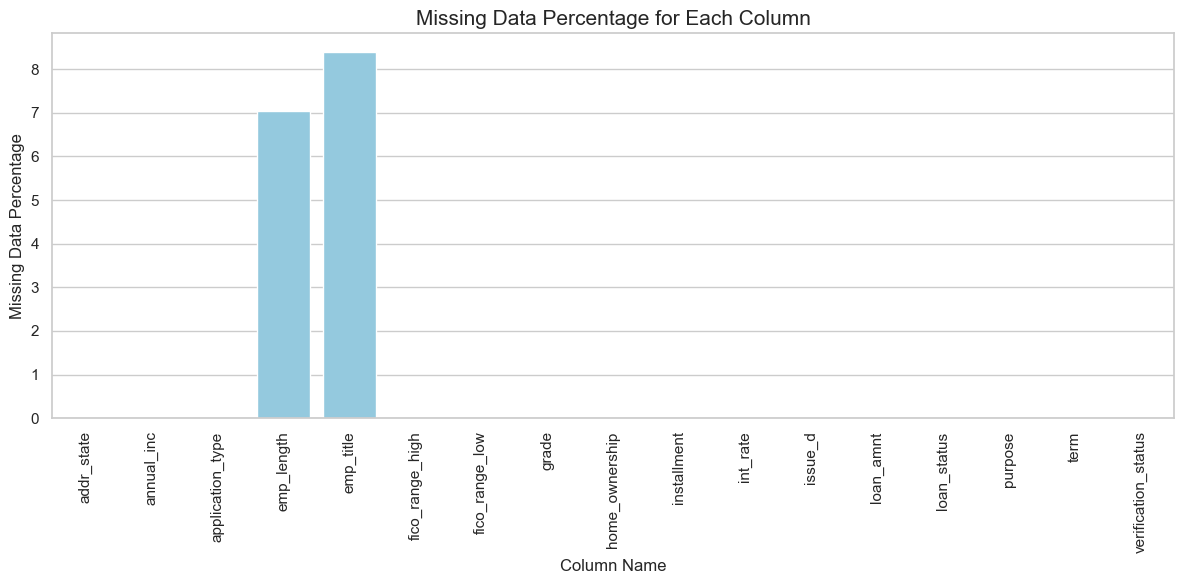

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_percentage = loan_data.isnull().mean() * 100

# Create a bar plot for the missing percentage
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Missing Data Percentage', fontsize=12)
plt.title('Missing Data Percentage for Each Column', fontsize=15)
plt.tight_layout()
plt.show()

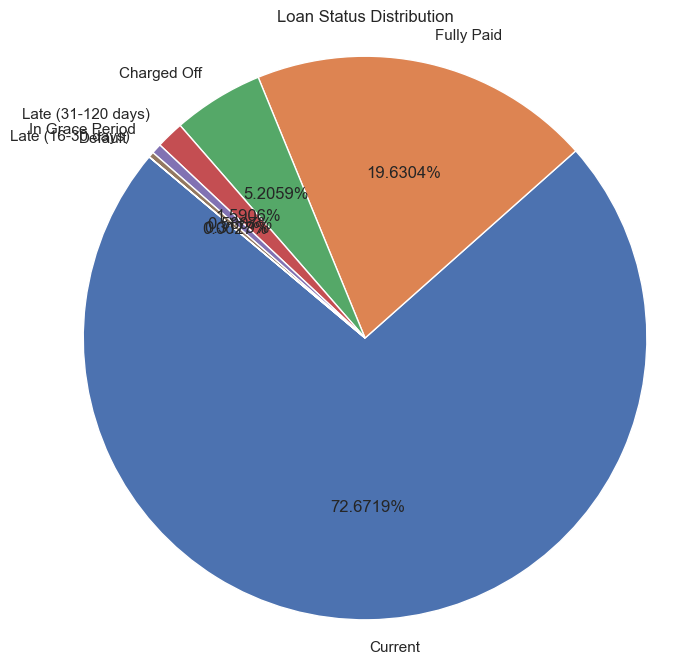

In [71]:
# Analysis of the loan status
import pandas as pd
import matplotlib.pyplot as plt

status_counts = loan_data['loan_status'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=140)
plt.axis('equal') 
plt.title('Loan Status Distribution')
plt.show()

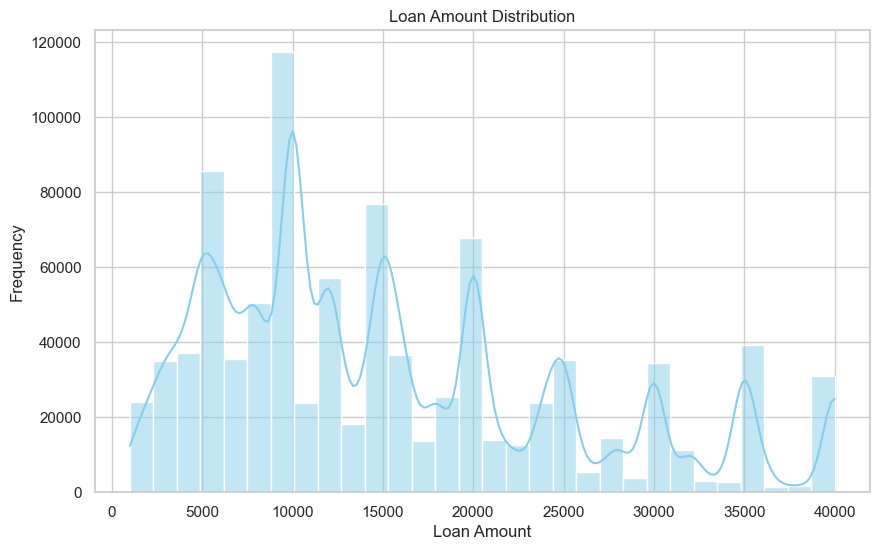

In [4]:
# Analysis of the distribution of loan amounts
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True, color='skyblue')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


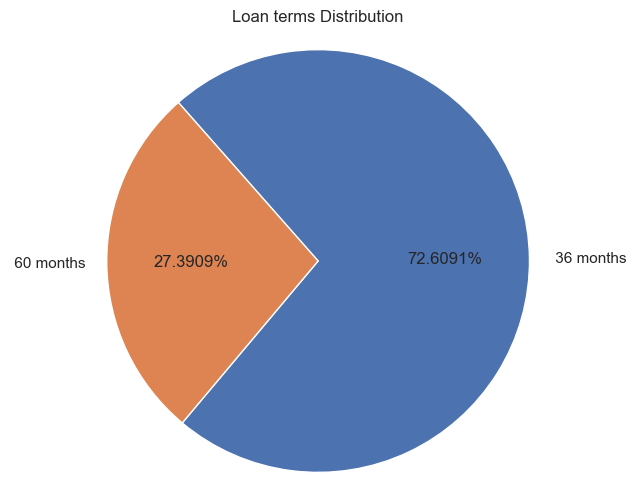

In [29]:
# Analysis of the distribution of loan terms 

import pandas as pd
import matplotlib.pyplot as plt

term_counts = loan_data['term'].value_counts()

labels = term_counts.index
sizes = term_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=230)
plt.axis('equal') 
plt.title('Loan terms Distribution')
plt.show()

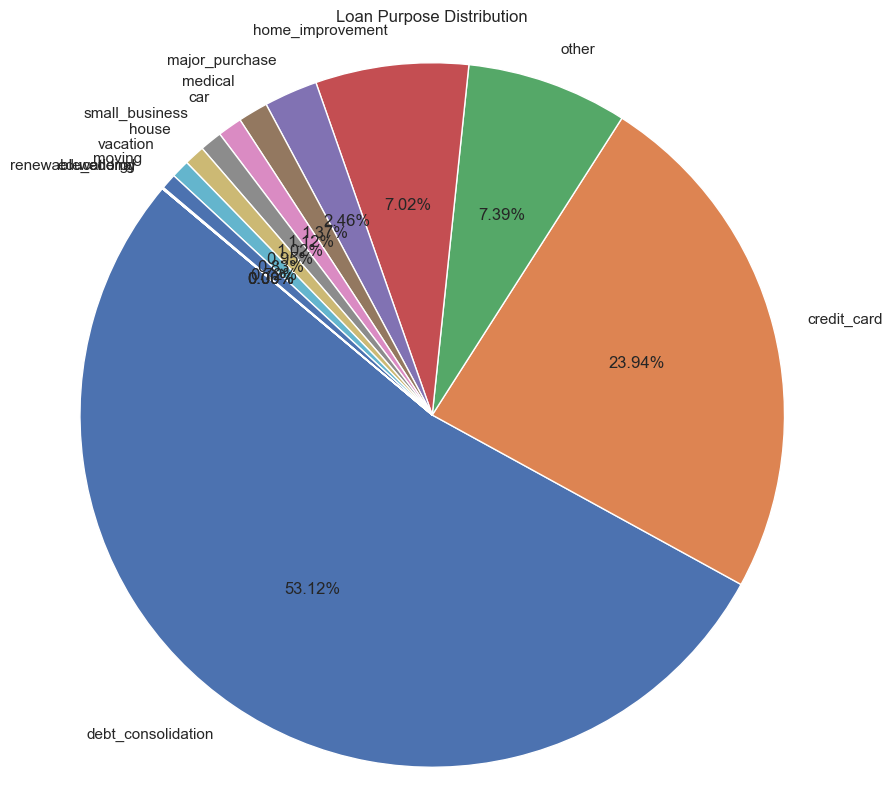

In [32]:
# Analysis of the distribution of loan purposes
import pandas as pd
import matplotlib.pyplot as plt

purpose_counts = loan_data['purpose'].value_counts()

labels = purpose_counts.index
sizes = purpose_counts.values

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
plt.axis('equal') 
plt.title('Loan Purpose Distribution')
plt.show()

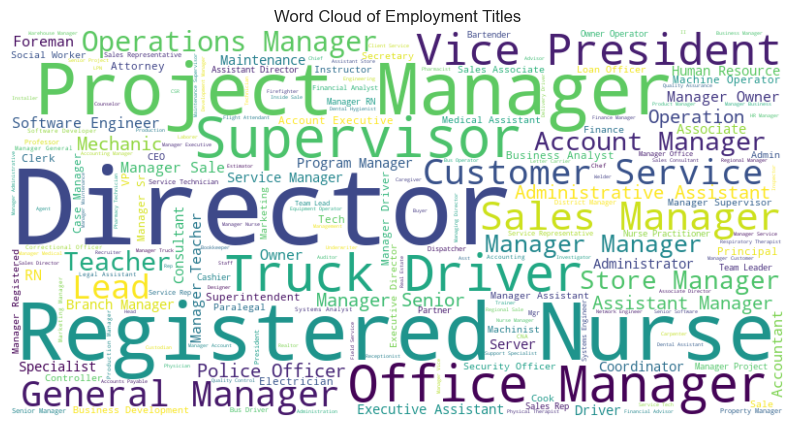

In [33]:
# Word cloud of job titles
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(loan_data['emp_title'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Employment Titles')
plt.axis('off')
plt.show()


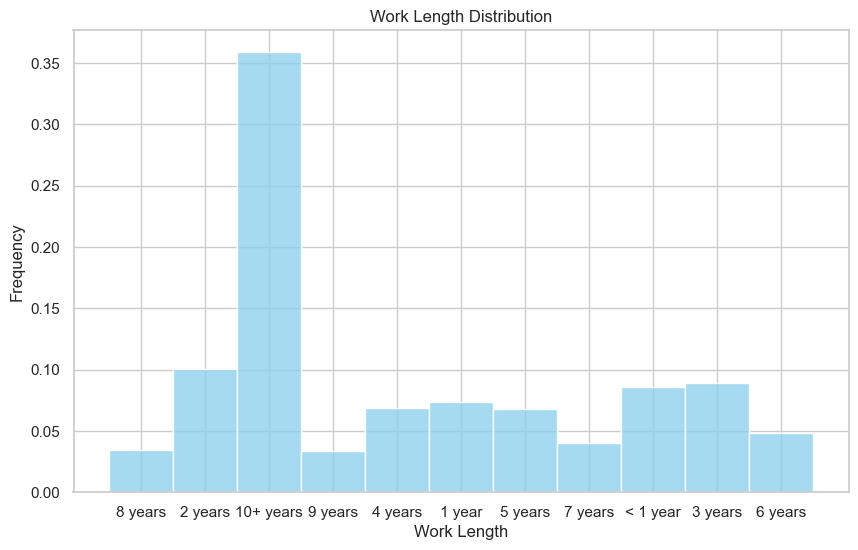

In [34]:
# Analysis of the distribution of work length
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['emp_length'], bins=30, color='skyblue',stat='density')
plt.title('Work Length Distribution')
plt.xlabel('Work Length')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Geographical distribution of the number of loans
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

state_counts = loan_data['addr_state'].value_counts()

fig = go.Figure(data = go.Choropleth(
    locations = state_counts.index,
    z=state_counts.values,
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title="Number of Loans",
    hoverinfo='location+z+text'
))
fig.update_layout(
    geo_scope = 'usa',
)
fig.show()



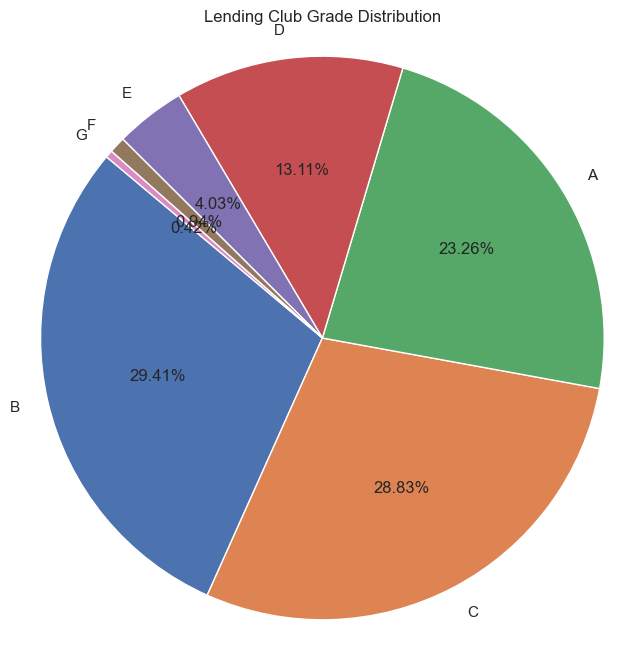

In [46]:
# Analysis of Lending Club grade
import pandas as pd
import matplotlib.pyplot as plt

grade_counts = loan_data['grade'].value_counts()

labels = grade_counts.index
sizes = grade_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140)
plt.axis('equal') 
plt.title('Lending Club Grade Distribution')
plt.show()

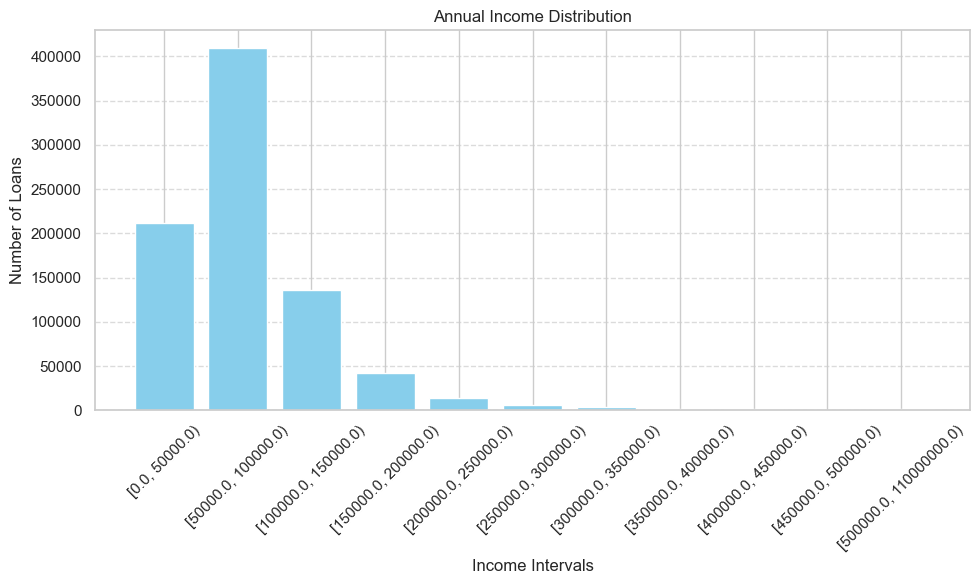

In [45]:
# Analysis of annual income
import pandas as pd
import matplotlib.pyplot as plt

max_income = loan_data['annual_inc'].max()

bins = list(range(0, 500001, 50000)) + [max_income]
income_intervals = pd.cut(loan_data['annual_inc'], bins=bins, right=False)
income_distribution = income_intervals.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(income_distribution)), income_distribution, color='skyblue')
plt.title('Annual Income Distribution')
plt.xlabel('Income Intervals')
plt.ylabel('Number of Loans')
plt.xticks(range(len(income_distribution)), income_distribution.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

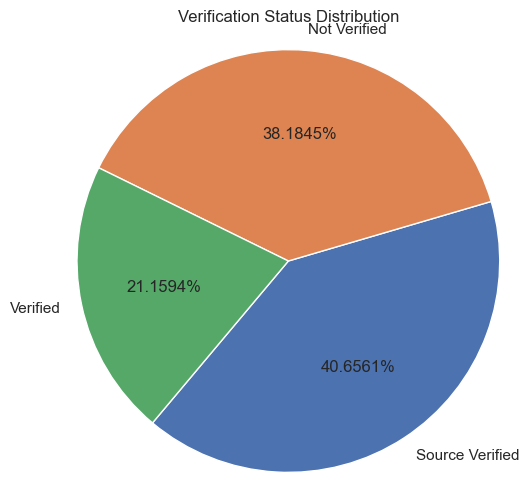

In [73]:
# Analysis of the distribution of verification status

import pandas as pd
import matplotlib.pyplot as plt

verified_counts = loan_data['verification_status'].value_counts()

labels = verified_counts.index
sizes = verified_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=230)
plt.axis('equal') 
plt.title('Verification Status Distribution')
plt.show()

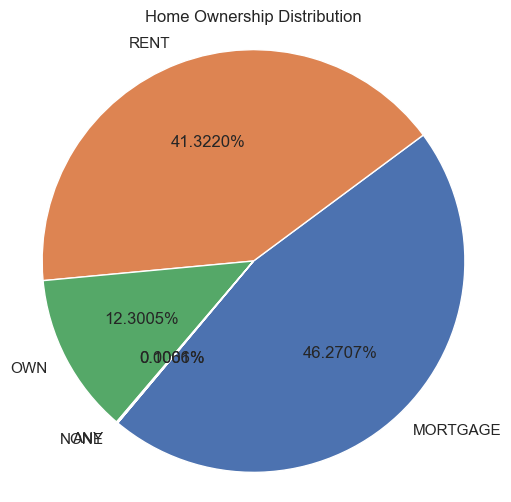

In [48]:
# Analysis of the distribution of home ownership

import pandas as pd
import matplotlib.pyplot as plt

home_counts = loan_data['home_ownership'].value_counts()

labels = home_counts.index
sizes = home_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.4f%%', startangle=230)
plt.axis('equal') 
plt.title('Home Ownership Distribution')
plt.show()

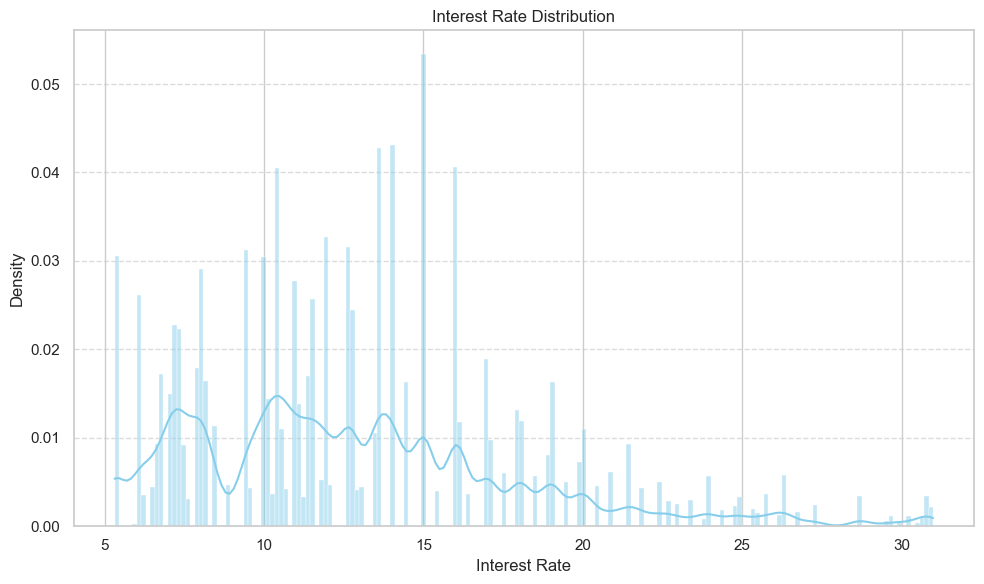

In [54]:
# Analysis of the distribution of interest rate
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(loan_data['int_rate'], stat='probability', kde=True,  color='skyblue')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


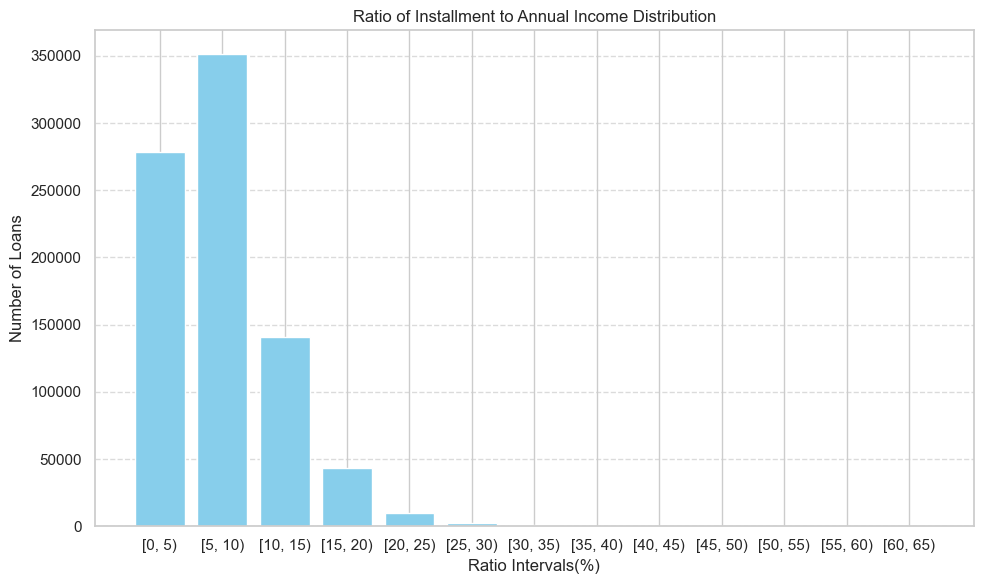

In [67]:
# Analysis of the proportional distribution of annual repayments and annual income
import pandas as pd
import matplotlib.pyplot as plt

loan_data['installment_annual_inc_ratio'] = loan_data['installment'] * 12 / loan_data['annual_inc']*100
max_ratio = loan_data['installment_annual_inc_ratio'].max()

bins = list(range(0, int(max_ratio)+5, 5)) 

ratio_intervals = pd.cut(loan_data['installment_annual_inc_ratio'], bins=bins, right=False)
ratio_distribution = ratio_intervals.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range(len(ratio_distribution)), ratio_distribution, color='skyblue')
plt.title('Ratio of Installment to Annual Income Distribution')
plt.xlabel('Ratio Intervals(%)')
plt.ylabel('Number of Loans')
plt.xticks(range(len(ratio_distribution)), ratio_distribution.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

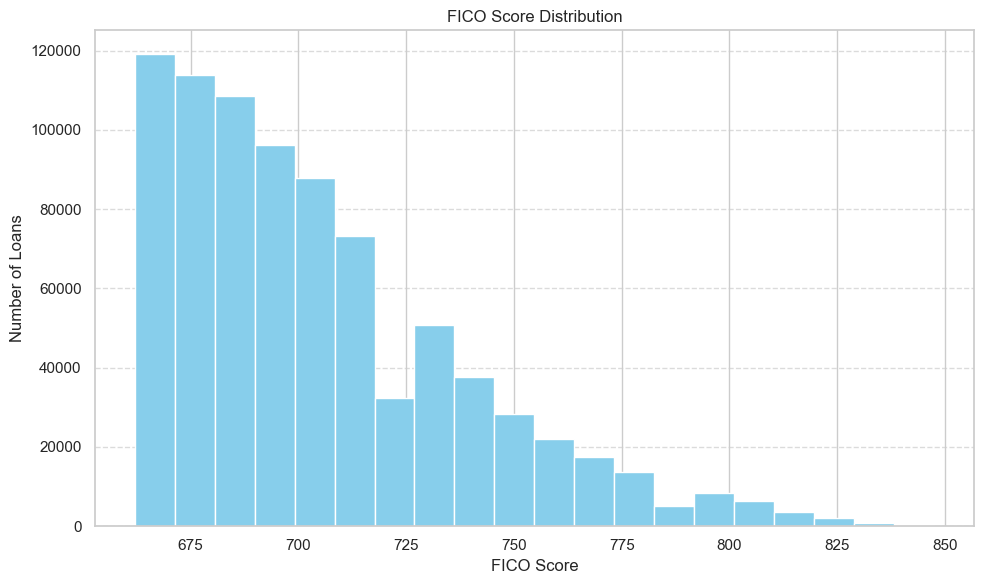

In [69]:
# Analysis of FICO Score Distribution
import pandas as pd
import matplotlib.pyplot as plt

loan_data['fico_mean'] = (loan_data['fico_range_high'] + loan_data['fico_range_low']) / 2

plt.figure(figsize=(10, 6))
plt.hist(loan_data['fico_mean'], bins=20, color='skyblue')
plt.title('FICO Score Distribution')
plt.xlabel('FICO Score')
plt.ylabel('Number of Loans')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [89]:
# Constructing a default prediction model based on load_status
# Data preprocessing

# Current status does not indicate whether the borrower will default in the future and needs to be removed
data_processed = loan_data[(loan_data['loan_status'] != 'Current')]
data_processed['label'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

# Preserve numerical and nominal features
# Remove 'installment', because 'installment_annual_inc_ratio' contains information about it
selected_columns=['addr_state','annual_inc','emp_length','grade','home_ownership','int_rate','loan_amnt','term','verification_status','fico_mean','installment_annual_inc_ratio','label']
data_processed = data_processed[selected_columns]
data_processed.dropna(inplace=True)

C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\2348732359.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
# Processing nominal features
# 1. Numerical encoding for the 'addr_state' column
data_processed['addr_state'] = data_processed['addr_state'].astype('category').cat.codes

# 2. Numerical encoding for the 'emp_length' column
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
data_processed['emp_length'] = data_processed['emp_length'].replace(emp_length_mapping)

# 3. Numerical encoding for the 'grade' column
grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}
data_processed['grade'] = data_processed['grade'].replace(grade_mapping)

# 4. Keep only 'RENT', 'OWN', 'MORTGAGE' categories for 'home_ownership', and use numerical encoding
data_processed = data_processed[data_processed['home_ownership'].isin(['RENT', 'OWN', 'MORTGAGE'])]
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2}
data_processed['home_ownership'] = data_processed['home_ownership'].replace(home_ownership_mapping)

# 5. Numerical encoding for the 'term' column
term_mapping = {' 36 months': 0, ' 60 months': 1}
data_processed['term'] = data_processed['term'].replace(term_mapping)

# 6. Numerical encoding for the 'verification_status' column
verification_status_mapping = {'Verified': 1, 'Source Verified': 0, 'Not Verified': -1}
data_processed['verification_status'] = data_processed['verification_status'].replace(verification_status_mapping)

C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\3407916081.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\3407916081.py:31: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\muyan\AppData\Local\Temp\ipykernel_30236\3407916081.py:36: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [91]:
data_processed.head(5)

,addr_state,annual_inc,emp_length,grade,home_ownership,int_rate,loan_amnt,term,verification_status,fico_mean,installment_annual_inc_ratio,label
3,46,52000.0,9,1,0,7.34,3000.0,0,0,762.0,2.148462,1
13,10,55000.0,10,2,1,11.98,5000.0,0,-1,677.0,3.622473,1
20,42,40000.0,0,2,2,11.98,7000.0,0,1,697.0,6.973200,1
21,33,55000.0,0,4,0,17.47,20300.0,1,1,707.0,11.119855,0
34,9,57000.0,10,4,1,21.85,30000.0,0,1,682.0,24.071368,1


In [92]:
# Normalized
from sklearn.preprocessing import StandardScaler

features_to_normalize = ['addr_state', 'annual_inc', 'emp_length', 'grade', 'home_ownership', 'int_rate',
'loan_amnt', 'term', 'verification_status', 'fico_mean', 'installment_annual_inc_ratio']

scaler = StandardScaler()

data_processed[features_to_normalize] = scaler.fit_transform(data_processed[features_to_normalize])


Accuracy: 0.7306631804135963
F1 Score: 0.8361459372695328
AUC: 0.6993916755534262


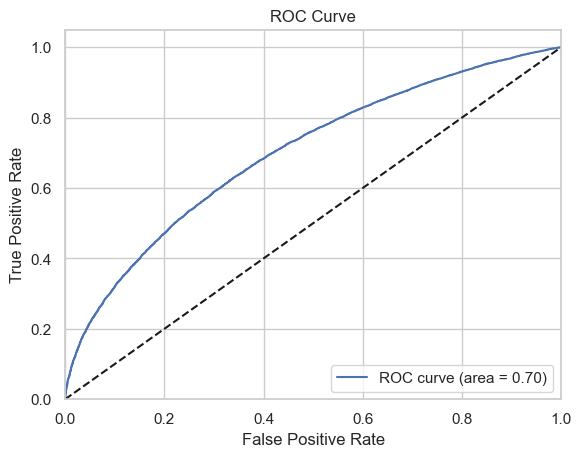

In [94]:
# A Model based on Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = data_processed.drop(columns=['label']) 
y = data_processed['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7242215355360114
F1 Score: 0.8301218226543282
AUC: 0.6797147422505333


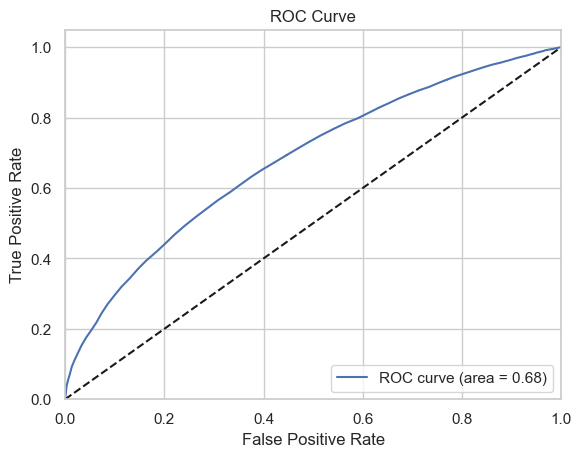

In [97]:
# A Model based on Random Forest(untuned)
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 121970, number of negative: 46310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 168280, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy: 0.6350130734490136
F1 Score: 0.7091250071037527
AUC: 0.70839108004112


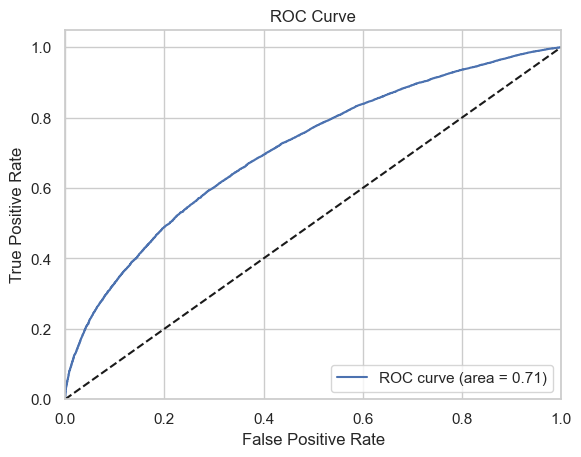

In [99]:
# A Model based on Light-GBM(untuned)
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

lgb_model.fit(X_train, y_train)

lgb_y_pred = lgb_model.predict(X_test)


accuracy = accuracy_score(y_test, lgb_y_pred)
f1 = f1_score(y_test, lgb_y_pred)

fpr, tpr, thresholds = roc_curve(y_test, lgb_model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:,1])

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Neither Random Forest nor LightGBM currently predicts better than Logistic regression, after which tuning parameters are needed to optimize the model.